<a href="https://colab.research.google.com/github/vineetbiyani09/ML/blob/master/EXP_7/J010_Exp_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

## Forest Cover

### Loading Dataset and Preprocessing

In [ ]:
forest = fetch_covtype()
x_fetch_covtype = forest.data
y_fetch_covtype = forest.target

In [ ]:
x_forest = pd.DataFrame(x_fetch_covtype)
y_forest = pd.DataFrame(y_fetch_covtype)
print(x_forest.shape)
print(y_forest.shape)

(581012, 54)
(581012, 1)


### Making a Neural Network

In [ ]:
y_fore = y_forest.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
y_fore = to_categorical(y_fore)
x_train, x_test, y_train, y_test = train_test_split(x_forest, y_fore, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(464809, 54)
(58101, 54)
(58102, 54)
(464809, 7)
(58101, 7)
(58102, 7)


In [ ]:
nn_forest = models.Sequential()
nn_forest.add(layers.Dense(512, activation = 'relu', input_shape = (54, )))
nn_forest.add(layers.Dense(256, activation = 'relu'))
nn_forest.add(layers.Dense(128, activation = 'relu'))
nn_forest.add(layers.Dense(54, activation = 'relu'))
nn_forest.add(layers.Dense(7, activation = 'softmax'))
nn_forest.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
forest_history = nn_forest.fit(x_train, y_train, epochs = 75, batch_size = 5000, validation_data = (x_dev, y_dev))
for_dev_acc = nn_forest.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is',for_dev_acc)

Epoch 1/75
93/93 [==============================] - 1s 10ms/step - loss: 31.0924 - accuracy: 0.3930 - val_loss: 8.6153 - val_accuracy: 0.4902
Epoch 2/75
93/93 [==============================] - 1s 6ms/step - loss: 4.0837 - accuracy: 0.4075 - val_loss: 1.9526 - val_accuracy: 0.4868
Epoch 3/75
93/93 [==============================] - 1s 6ms/step - loss: 2.2389 - accuracy: 0.4158 - val_loss: 1.1598 - val_accuracy: 0.4607
Epoch 4/75
93/93 [==============================] - 1s 6ms/step - loss: 1.5702 - accuracy: 0.4518 - val_loss: 1.1550 - val_accuracy: 0.5027
Epoch 5/75
93/93 [==============================] - 1s 6ms/step - loss: 1.3818 - accuracy: 0.4595 - val_loss: 1.0231 - val_accuracy: 0.5335
Epoch 6/75
93/93 [==============================] - 1s 6ms/step - loss: 1.1568 - accuracy: 0.4857 - val_loss: 1.0450 - val_accuracy: 0.5174
Epoch 7/75
93/93 [==============================] - 1s 6ms/step - loss: 1.1046 - accuracy: 0.5026 - val_loss: 0.9656 - val_accuracy: 0.5402
Epoch 8/75
93/93 [

### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

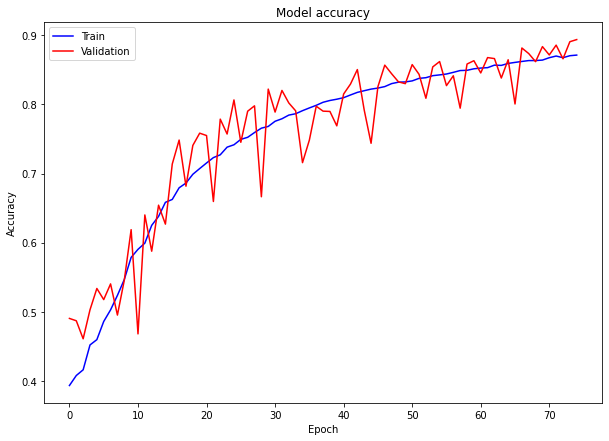

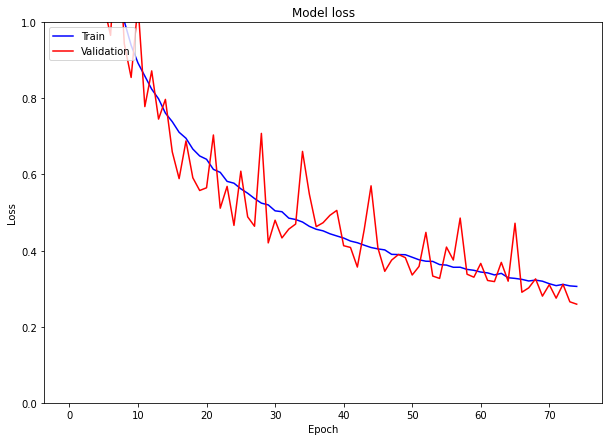

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(forest_history.history['accuracy'], color = 'blue')
plt.plot(forest_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(forest_history.history['loss'], color = 'blue')
plt.plot(forest_history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
for_test_acc = nn_forest.evaluate(x_test, y_test)[1]
print('The test accuracy is',for_test_acc)

1816/1816 [==============================] - 4s 2ms/step - loss: 0.2538 - accuracy: 0.8972
The test accuracy is 0.8971807956695557


## Fetch CupKdd99

### Loading and Preprocessing the Data

In [ ]:
kddcup99 = fetch_kddcup99()
x_fetch_kddcup99 = kddcup99.data
y_fetch_kddcup99 = kddcup99.target

In [ ]:
x_kdd = pd.DataFrame(x_fetch_kddcup99)
y_kdd = pd.DataFrame(y_fetch_kddcup99)
print(x_kdd.shape)
print(y_kdd.shape)

(494021, 41)
(494021, 1)


In [ ]:
le = LabelEncoder()
for i in [1,2,3]:
  x_kdd[i] = [j.decode('utf-8') for j in x_kdd[i]]
  x_kdd[i] = le.fit_transform(x_kdd[i])

for i in range(x_kdd.shape[1]):
  x_kdd[i] = x_kdd[i].astype('float')

In [ ]:
y_kdd99 = [i.decode('utf-8') for i in y_fetch_kddcup99]
y_kdd99 = pd.DataFrame(le.fit_transform(y_kdd99))

### Making A Neural Network

In [ ]:
y_kdd99 = to_categorical(y_kdd99)
x_train, x_test, y_train, y_test = train_test_split(x_kdd, y_kdd99, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(395216, 41)
(49402, 41)
(49403, 41)
(395216, 23)
(49402, 23)
(49403, 23)


In [ ]:
nn_kdd99 = models.Sequential()
nn_kdd99.add(layers.Dense(256, activation = 'relu', input_shape = (41, )))
nn_kdd99.add(layers.Dense(128, activation = 'relu'))
nn_kdd99.add(layers.Dense(64, activation = 'relu'))
nn_kdd99.add(layers.Dense(32, activation = 'relu'))
nn_kdd99.add(layers.Dense(23, activation = 'softmax'))
nn_kdd99.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
kdd99_history = nn_kdd99.fit(x_train, y_train, epochs = 10, batch_size = 1000, validation_data = (x_dev, y_dev))
kdd99_dev_acc = nn_kdd99.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', kdd99_dev_acc)

Epoch 1/10
396/396 [==============================] - 2s 4ms/step - loss: 61.9987 - accuracy: 0.9642 - val_loss: 24.3387 - val_accuracy: 0.9374
Epoch 2/10
396/396 [==============================] - 1s 4ms/step - loss: 42.1834 - accuracy: 0.9795 - val_loss: 9.7455 - val_accuracy: 0.9900
Epoch 3/10
396/396 [==============================] - 1s 4ms/step - loss: 76.0218 - accuracy: 0.9834 - val_loss: 2.7655 - val_accuracy: 0.9687
Epoch 4/10
396/396 [==============================] - 1s 4ms/step - loss: 38.5087 - accuracy: 0.9873 - val_loss: 5.6185 - val_accuracy: 0.9928
Epoch 5/10
396/396 [==============================] - 1s 4ms/step - loss: 57.0495 - accuracy: 0.9857 - val_loss: 4.4019 - val_accuracy: 0.9874
Epoch 6/10
396/396 [==============================] - 1s 4ms/step - loss: 1.3594 - accuracy: 0.9850 - val_loss: 1.3973 - val_accuracy: 0.9922
Epoch 7/10
396/396 [==============================] - 1s 4ms/step - loss: 0.6610 - accuracy: 0.9900 - val_loss: 0.0309 - val_accuracy: 0.9925


### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

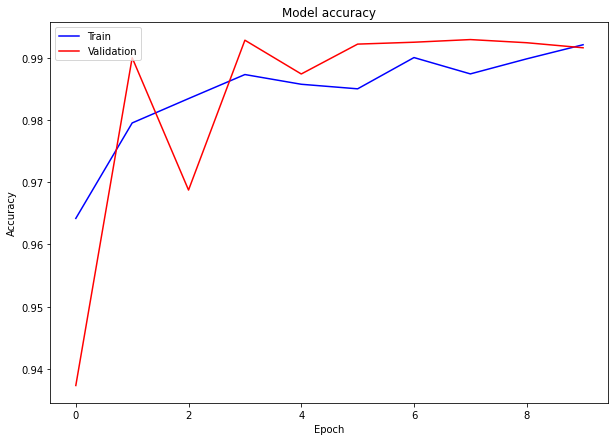

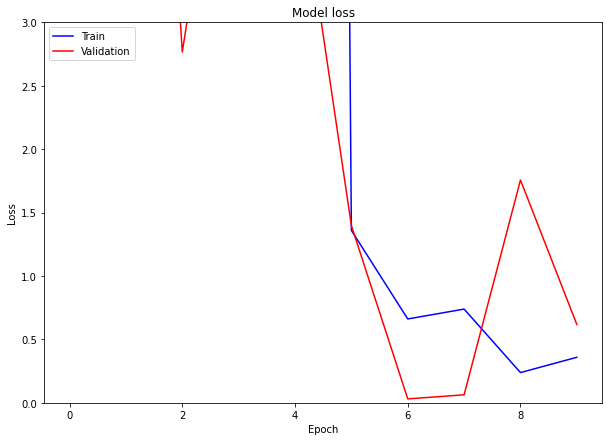

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(kdd99_history.history['accuracy'], color = 'blue')
plt.plot(kdd99_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(kdd99_history.history['loss'], color = 'blue')
plt.plot(kdd99_history.history['val_loss'], color = 'red')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
kdd99_test_acc = nn_kdd99.evaluate(x_test, y_test)[1]
print('The test accuracy is', kdd99_test_acc)

1544/1544 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.9909
The test accuracy is 0.9908912181854248


## Fetch Lfw Pairs

### Loading the data and preprocessing

In [ ]:
lfw = fetch_lfw_pairs()
x_fetch_lfw_pairs = lfw.data
y_fetch_lfw_pairs = lfw.target

In [ ]:
x_lfw_pairs = pd.DataFrame(x_fetch_lfw_pairs)
y_lfw_pairs = pd.DataFrame(y_fetch_lfw_pairs)
print(x_lfw_pairs.shape)
print(y_lfw_pairs.shape)

(2200, 5828)
(2200, 1)


### Making A Neural Network

In [ ]:
# y_fore = y_forest.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
# y_fore = to_categorical(y_fore)
x_train, x_test, y_train, y_test = train_test_split(x_lfw_pairs, y_lfw_pairs, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(1760, 5828)
(220, 5828)
(220, 5828)
(1760, 1)
(220, 1)
(220, 1)


In [ ]:
nn_lfw_pairs = models.Sequential()

nn_lfw_pairs.add(layers.Dense(11652, activation = 'relu', input_shape = (5828, )))
nn_lfw_pairs.add(layers.Dense(5828, activation = 'relu'))
nn_lfw_pairs.add(layers.Dense(2914, activation = 'relu'))
nn_lfw_pairs.add(layers.Dense(1457, activation = 'relu'))
nn_lfw_pairs.add(layers.Dense(128))
nn_lfw_pairs.add(layers.LeakyReLU(alpha = 0.01))
nn_lfw_pairs.add(layers.Dense(64, activation = 'relu'))
nn_lfw_pairs.add(layers.Dense(1, activation = 'sigmoid'))

nn_lfw_pairs.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
lfw_pairs_history = nn_lfw_pairs.fit(x_train, y_train, epochs = 25, batch_size = 150,
                                     validation_data = (x_dev, y_dev))
lfw_pairs_dev_acc = nn_lfw_pairs.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', lfw_pairs_dev_acc)

Epoch 1/25
12/12 [==============================] - 1s 120ms/step - loss: 127680.1562 - accuracy: 0.4938 - val_loss: 75.3374 - val_accuracy: 0.5182
Epoch 2/25
12/12 [==============================] - 1s 93ms/step - loss: 66.0895 - accuracy: 0.5148 - val_loss: 45.0972 - val_accuracy: 0.5182
Epoch 3/25
12/12 [==============================] - 1s 93ms/step - loss: 32.1944 - accuracy: 0.5023 - val_loss: 4.1050 - val_accuracy: 0.5182
Epoch 4/25
12/12 [==============================] - 1s 92ms/step - loss: 4.7309 - accuracy: 0.5051 - val_loss: 0.7955 - val_accuracy: 0.5182
Epoch 5/25
12/12 [==============================] - 1s 93ms/step - loss: 0.7020 - accuracy: 0.5011 - val_loss: 0.6934 - val_accuracy: 0.4818
Epoch 6/25
12/12 [==============================] - 1s 93ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.4818
Epoch 7/25
12/12 [==============================] - 1s 93ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.4818
Epo

### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

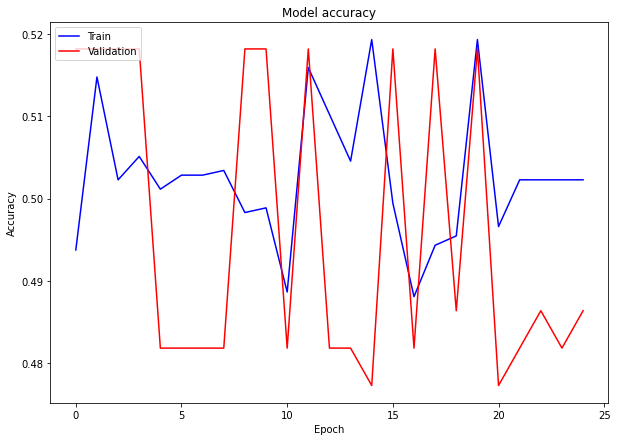

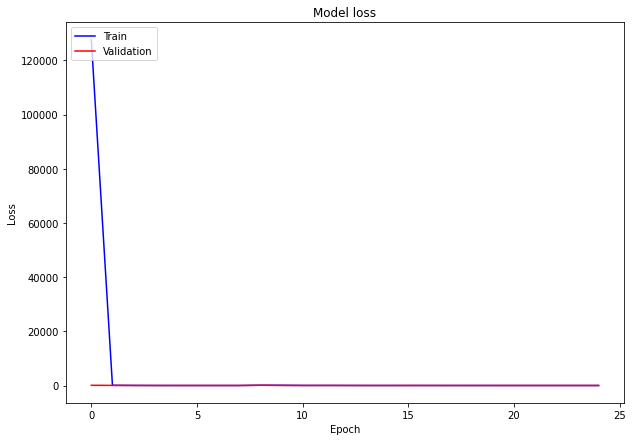

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(lfw_pairs_history.history['accuracy'], color = 'blue')
plt.plot(lfw_pairs_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(lfw_pairs_history.history['loss'], color = 'blue')
plt.plot(lfw_pairs_history.history['val_loss'], color = 'red')
# plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
lfw_pairs_test_acc = nn_lfw_pairs.evaluate(x_test, y_test)[1]
print('The test accuracy is', lfw_pairs_test_acc)

7/7 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5136
The test accuracy is 0.5136363506317139


## Fetch LFw People

### Loading the Dataset and Preprocessing

In [ ]:
lfw = fetch_lfw_pairs()
x_fetch_lfw = fetch_lfw_people().data
y_fetch_lfw = fetch_lfw_people().target

In [ ]:
x_lfw = pd.DataFrame(x_fetch_lfw)
y_lfw = pd.DataFrame(y_fetch_lfw)
print(x_lfw.shape)
print(y_lfw.shape)

(13233, 2914)
(13233, 1)


In [ ]:
for i in range(x_lfw.shape[1]):
  x_lfw[i] = x_lfw[i] / 255

### Making a Neural Network

In [ ]:
y_lfw = to_categorical(y_lfw)
x_train, x_test, y_train, y_test = train_test_split(x_lfw, y_lfw, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(10586, 2914)
(1323, 2914)
(1324, 2914)
(10586, 5749)
(1323, 5749)
(1324, 5749)


In [ ]:
nn_lfw = models.Sequential()

nn_lfw.add(layers.Dense(2048, activation = 'relu', input_shape = (2914, )))
nn_lfw.add(layers.Dense(8192, activation = 'relu'))
nn_lfw.add(layers.Dense(4096, activation = 'relu'))
nn_lfw.add(layers.Dense(2048, activation = 'relu'))
nn_lfw.add(layers.Dense(4096, activation = 'relu'))
nn_lfw.add(layers.Dense(5120, activation = 'relu'))
nn_lfw.add(layers.Dense(5749, activation = 'softmax'))

nn_lfw.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
lfw_history = nn_lfw.fit(x_train, y_train, epochs = 10, batch_size = 1000, validation_data = (x_dev, y_dev))

lfw_dev_acc = nn_lfw.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', lfw_dev_acc)

Epoch 1/10
11/11 [==============================] - 2s 220ms/step - loss: 8.6474 - accuracy: 0.0118 - val_loss: 8.6385 - val_accuracy: 0.0446
Epoch 2/10
11/11 [==============================] - 2s 213ms/step - loss: 8.6308 - accuracy: 0.0396 - val_loss: 8.6204 - val_accuracy: 0.0446
Epoch 3/10
11/11 [==============================] - 2s 214ms/step - loss: 8.6120 - accuracy: 0.0396 - val_loss: 8.5983 - val_accuracy: 0.0446
Epoch 4/10
11/11 [==============================] - 2s 215ms/step - loss: 8.5878 - accuracy: 0.0396 - val_loss: 8.5681 - val_accuracy: 0.0446
Epoch 5/10
11/11 [==============================] - 2s 217ms/step - loss: 8.5534 - accuracy: 0.0396 - val_loss: 8.5232 - val_accuracy: 0.0446
Epoch 6/10
11/11 [==============================] - 2s 217ms/step - loss: 8.5000 - accuracy: 0.0396 - val_loss: 8.4521 - val_accuracy: 0.0446
Epoch 7/10
11/11 [==============================] - 2s 217ms/step - loss: 8.4173 - accuracy: 0.0396 - val_loss: 8.3548 - val_accuracy: 0.0446
Epoch 

### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

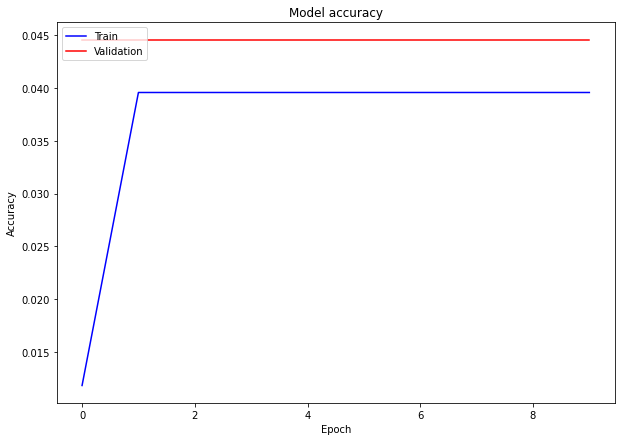

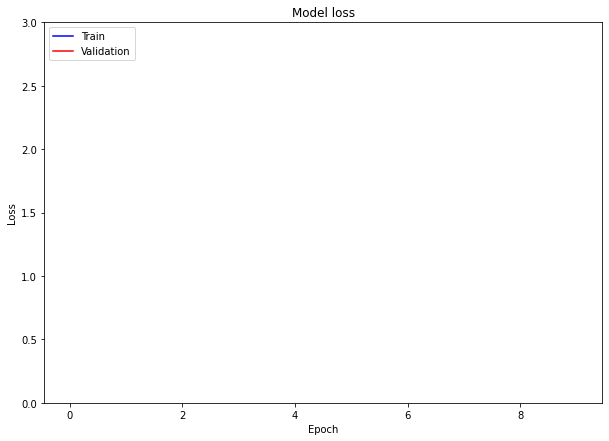

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(lfw_history.history['accuracy'], color = 'blue')
plt.plot(lfw_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(lfw_history.history['loss'], color = 'blue')
plt.plot(lfw_history.history['val_loss'], color = 'red')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
lfw_test_acc = nn_lfw.evaluate(x_test, y_test)[1]
print('The test accuracy is', lfw_test_acc)

42/42 [==============================] - 0s 5ms/step - loss: 8.2986 - accuracy: 0.0393
The test accuracy is 0.039274923503398895


## Olivetti Faces

### Loading the data and Preprocessing

In [ ]:
oli = fetch_olivetti_faces(shuffle = True)
x_fetch_olivetti_faces = oli.data
y_fetch_olivetti_faces = oli.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
x_oli = pd.DataFrame(x_fetch_olivetti_faces)
y_oli = pd.DataFrame(y_fetch_olivetti_faces)
print(x_fetch_olivetti_faces.shape)
print(y_oli.shape)

(400, 4096)
(400, 1)


### Making a Neural Network

In [ ]:
y_oli = to_categorical(y_oli)
x_train, x_test, y_train, y_test = train_test_split(x_oli, y_oli, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(320, 4096)
(40, 4096)
(40, 4096)
(320, 40)
(40, 40)
(40, 40)


In [ ]:
nn_oli = models.Sequential()

nn_oli.add(layers.Dense(2048, activation = 'relu', input_shape = (4096, )))
nn_oli.add(layers.Dense(1024, activation = 'relu'))
nn_oli.add(layers.Dense(512, activation = 'relu'))
nn_oli.add(layers.Dense(256, activation = 'relu'))
nn_oli.add(layers.Dense(40, activation = 'softmax'))

nn_oli.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
oli_history = nn_oli.fit(x_train, y_train, epochs = 75, validation_data = (x_dev, y_dev))

oli_dev_acc = nn_oli.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', oli_dev_acc)

Epoch 1/75
10/10 [==============================] - 0s 25ms/step - loss: 3.7177 - accuracy: 0.0312 - val_loss: 3.7095 - val_accuracy: 0.0000e+00
Epoch 2/75
10/10 [==============================] - 0s 5ms/step - loss: 3.6356 - accuracy: 0.0625 - val_loss: 3.6894 - val_accuracy: 0.0750
Epoch 3/75
10/10 [==============================] - 0s 5ms/step - loss: 3.5885 - accuracy: 0.0969 - val_loss: 3.6624 - val_accuracy: 0.0250
Epoch 4/75
10/10 [==============================] - 0s 5ms/step - loss: 3.5505 - accuracy: 0.0844 - val_loss: 3.6134 - val_accuracy: 0.0750
Epoch 5/75
10/10 [==============================] - 0s 5ms/step - loss: 3.5268 - accuracy: 0.1094 - val_loss: 3.5878 - val_accuracy: 0.0500
Epoch 6/75
10/10 [==============================] - 0s 5ms/step - loss: 3.4517 - accuracy: 0.1531 - val_loss: 3.5827 - val_accuracy: 0.0000e+00
Epoch 7/75
10/10 [==============================] - 0s 5ms/step - loss: 3.4140 - accuracy: 0.1281 - val_loss: 3.5787 - val_accuracy: 0.0250
Epoch 8/75


### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

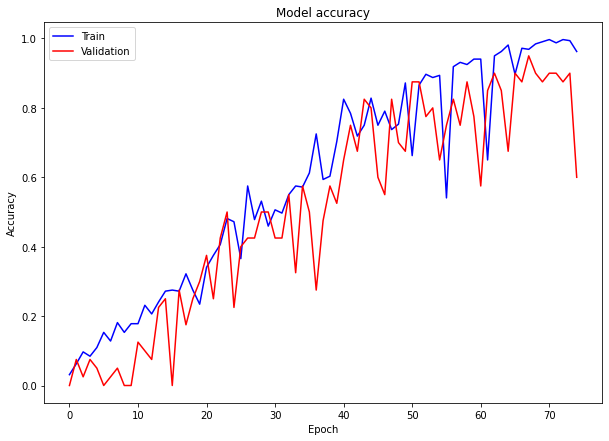

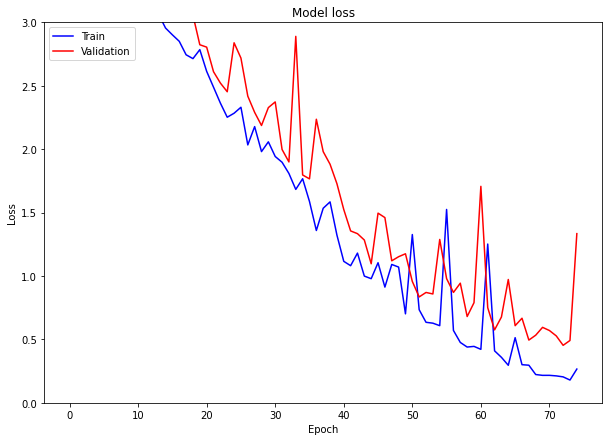

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(oli_history.history['accuracy'], color = 'blue')
plt.plot(oli_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(oli_history.history['loss'], color = 'blue')
plt.plot(oli_history.history['val_loss'], color = 'red')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
oli_test_acc = nn_oli.evaluate(x_test, y_test)[1]
print('The test accuracy is', oli_test_acc)

2/2 [==============================] - 0s 4ms/step - loss: 1.4567 - accuracy: 0.6000
The test accuracy is 0.6000000238418579


## RCV1 Dataset

###  Loading The Dataset and Preprocessing

In [ ]:
rcv1 = fetch_rcv1()
x_fetch_rcv1 = rcv1.data
y_fetch_rcv1 = rcv1.target

In [ ]:
x_rcv1 = x_fetch_rcv1
y_rcv1 = y_fetch_rcv1
print(x_rcv1.shape)
print(y_rcv1.shape)

(804414, 47236)
(804414, 103)


### Making a Neural Network

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rcv1, y_rcv1, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(643531, 47236)
(80441, 47236)
(80442, 47236)
(643531, 103)
(80441, 103)
(80442, 103)


In [ ]:
nn_rcv1 = models.Sequential()

nn_rcv1.add(layers.Dense(100, activation = 'relu', input_shape = (47236, )))
nn_rcv1.add(layers.Dense(2500, activation = 'relu'))
nn_rcv1.add(layers.Dense(1024, activation = 'relu'))
nn_rcv1.add(layers.Dense(512, activation = 'relu'))
nn_rcv1.add(layers.Dense(256, activation = 'relu'))
nn_rcv1.add(layers.Dense(103, activation = 'softmax'))

nn_rcv1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
rcv1_history = nn_rcv1.fit(x_train, y_train, epochs = 75, validation_data = (x_dev, y_dev))

rcv1_dev_acc = nn_rcv1.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', rcv1_dev_acc)

### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(rcv1_history.history['accuracy'], color = 'blue')
plt.plot(rcv1_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(rcv1_history.history['loss'], color = 'blue')
plt.plot(rcv1_history.history['val_loss'], color = 'red')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
rcv1_test_acc = nn_rcv1.evaluate(x_test, y_test)[1]
print('The test accuracy is', rcv1_test_acc)

## Breast Cancer Dataset

### Loading the Dataset and Preprocessing 

In [ ]:
cancer = load_breast_cancer()
x_load_breast_cancer = cancer.data
y_load_breast_cancer = cancer.target

In [ ]:
x_cancer = pd.DataFrame(x_load_breast_cancer)
y_cancer = pd.DataFrame(y_load_breast_cancer)
print(x_cancer.shape)
print(y_cancer.shape)

In [ ]:
sc = StandardScaler()
x_cancer = pd.DataFrame(sc.fit_transform(x_cancer))

### Making a Neural Network

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle = True)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

In [ ]:
nn_cancer = models.Sequential()

nn_cancer.add(layers.Dense(128, activation = 'relu', input_shape = (30, )))
nn_cancer.add(layers.Dense(64, activation = 'relu'))
nn_cancer.add(layers.Dense(1, activation = 'sigmoid'))

nn_cancer.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cancer_history = nn_cancer.fit(x_train, y_train, epochs = 30, validation_data = (x_dev, y_dev))

cancer_dev_acc = nn_cancer.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', cancer_dev_acc)

### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(cancer_history.history['accuracy'], color = 'blue')
plt.plot(cancer_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(cancer_history.history['loss'], color = 'blue')
plt.plot(cancer_history.history['val_loss'], color = 'red')
# plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
cancer_test_acc = nn_cancer.evaluate(x_test, y_test)[1]
print('The test accuracy is', cancer_test_acc)

## Digits Dataset

### Loading the Dataset and Preprocessing 

In [ ]:
digits = load_digits()
x_load_digits = digits.data
y_load_digits = digits.target

In [ ]:
x_digits = pd.DataFrame(x_load_digits)
y_digits = pd.DataFrame(y_load_digits)
print(x_digits.shape)
print(y_digits.shape)

In [ ]:
sc = StandardScaler()
x_digits = pd.DataFrame(sc.fit_transform(x_digits))

### Making a Neural Network

In [ ]:
y_digits = to_categorical(y_digits)
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle = True)
print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)
print(x_test.shape, y_test.shape)

In [ ]:
nn_digits = models.Sequential()

nn_digits.add(layers.Dense(128, activation = 'relu', input_shape = (64, )))
nn_digits.add(layers.Dense(64, activation = 'relu'))
nn_digits.add(layers.Dense(10, activation = 'softmax'))

nn_digits.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
digits_history = nn_digits.fit(x_train, y_train, epochs = 30, validation_data = (x_dev, y_dev))

digits_dev_acc = nn_digits.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', digits_dev_acc)

### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(digits_history.history['accuracy'], color = 'blue')
plt.plot(digits_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(digits_history.history['loss'], color = 'blue')
plt.plot(digits_history.history['val_loss'], color = 'red')
# plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
digits_test_acc = nn_digits.evaluate(x_test, y_test)[1]
print('The test accuracy is', digits_test_acc)

## Wine Dataset

### Loading the Dataset and Preprocessing 

In [ ]:
wine = load_wine()
x_load_wine = wine.data
y_load_wine = wine.target

In [ ]:
x_wine = pd.DataFrame(x_load_wine)
y_wine = pd.DataFrame(y_load_wine)
print(x_wine.shape)
print(y_wine.shape)

In [ ]:
sc = StandardScaler()
x_wine = pd.DataFrame(sc.fit_transform(x_wine))

### Making a Neural Network

In [ ]:
y_wine = to_categorical(y_wine)
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle = True)
print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)
print(x_test.shape, y_test.shape)

In [ ]:
nn_wine = models.Sequential()

nn_wine.add(layers.Dense(128, activation = 'relu', input_shape = (13, )))
nn_wine.add(layers.Dense(32, activation = 'relu'))
nn_wine.add(layers.Dense(3, activation = 'sigmoid'))

nn_wine.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
wine_history = nn_wine.fit(x_train, y_train, epochs = 75, validation_data = (x_dev, y_dev))

wine_dev_acc = nn_wine.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', wine_dev_acc)

### Plotting Accuracy & Validation Accuracy with Epoch
### Plotting Loss & Validation Loss with Epoch

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(wine_history.history['accuracy'], color = 'blue')
plt.plot(wine_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(wine_history.history['loss'], color = 'blue')
plt.plot(wine_history.history['val_loss'], color = 'red')
# plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
wine_test_acc = nn_wine.evaluate(x_test, y_test)[1]
print('The test accuracy is', wine_test_acc)